<div class="alert alert-info"> 

# Predict Breast Cancer

</div>

Predict the class of breast cancer (malignant or ‘bad’ versus benign or ‘good’) from the features of images taken from breast samples. Ten biological attributes of the cancer cell nuclei have been calculated.

--------------------------------------------------------------------------------

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable.
In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).
In other words, the logistic regression model predicts P(Y=1) as a function of X.
    


In [1]:
#Import pandas
import pandas as pd

# Load dataset
df = pd.read_csv('data/cancer.data', header = None)

# Inspect first five rows of data
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


<div class="alert alert-info"> 
    
## Data Preprocessing part 1
Technique that involves transforming raw data into an understandable format
</div>

In [2]:
# rename columns
df.rename(columns = {0 :'ID', 1 :'Clump Thickness', 2: 'Uniformity of Cell Size',
                        3:'Uniformity of Cell Shape', 4:'Marginal Adhesion', 5: 'Single Epithelial Cell Size',
                       6:'Bare Nuclei', 7:'Bland Chromatin', 8:'Normal Nucleoli',
                       9:'Mitoses', 10:'Class'}, inplace = True)

# Converting Class entries to binary
df['Class'] = df['Class'].replace([2,4], [1,0])

# Drop ID 

df.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,1
1,1002945,5,4,4,5,7,10,3,2,1,1
2,1015425,3,1,1,1,2,2,3,1,1,1
3,1016277,6,8,8,1,3,4,3,7,1,1
4,1017023,4,1,1,3,2,1,3,1,1,1


<div class="alert alert-info"> 
    
## Inspecting Data frame

</div>

In [5]:
from pandas_profiling import ProfileReport
#----------------------------------------------------------------------------------------------------------

profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_file(output_file="dataset_report.html")

### Profile Report Overview

##### Dataset statistics

- Number of variables------------ 11
- Number of observations--------- 699
- Missing cells------------------ 0
- Missing cells(%)--------------- 0.0%
- Duplicate rows----------------- 8
- Duplicate rows (%)------------- 1.1%
- Total size in memory----------- 98.8 KiB
- Average record size in memory-- 144.7 B
- Data types : int(10) and object(1)

<div class="alert alert-info"> 

## Handling the object values

</div>

In [ ]:
df['Bare Nuclei'].value_counts()

- value of ? occurs 16 times in the Bare Nuclei column

In [6]:
#Import numpy
import numpy as np
#------------------------------

#replace object with nan
df = df.replace('?', np.nan)

#display changes
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', nan, '5', '8', '6'],
      dtype=object)

In [7]:
# Iterate over each column of cc_apps
for col in df.columns:
    # Check if the column is of object type
    if df[col].dtypes == 'object':
        # Impute with the most frequent value
        df = df.fillna(df[col].value_counts().index[0])

In [8]:
#Inspecting for null value
df.isnull().sum()

ID                             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [9]:
# statistics summary

df.describe()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,0.655222
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.475636
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [10]:
df.dtypes

ID                              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

- The dataset information above shows that the data set still has object type even though the values where imputed with numerical values

<div class="alert alert-info"> 

## Preprocessing the data Part2


</div>

- Convert the non-numeric data into numeric.
- Split the data into train and test sets.
- Scale the feature values to a uniform range.



In [11]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder 

# Instantiate LabelEncoder
le =  LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df:
    # Compare if the dtype is object
    if df[col].dtypes =='object':
    # Use LabelEncoder to do the numeric transformation
        df[col]=le.fit_transform(df[col])

In [12]:
df.dtypes

ID                             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

- At last the dataset has intigers as data type

### correlation and pvalue

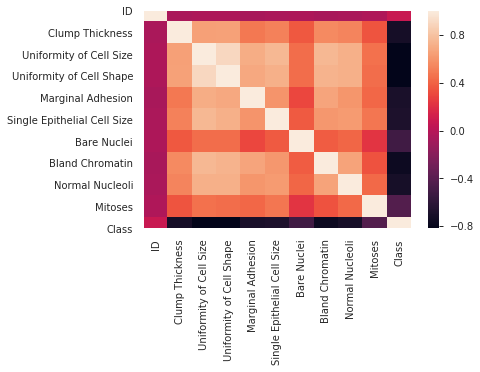

In [13]:
import seaborn as sns
#--------------------------

corr = df.corr()
sns.heatmap(corr)

In [14]:
'''
compare the correlation between features and remove one of two features 
that have a correlation higher than 0.9, to eliminate multicollinearity
'''

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]

### Hypothesis Testing

Null hypthesis    : The selected columns do not have a signifcant effect on Breast Cancer

Alternative Hypothesis : At least one of the selected columns affect breast cancer significantly

In [15]:
#Selecting columns/features based on p-value
import statsmodels.api as sm
#-------------------------------------------------------
selected_columns = selected_columns[1:-1].values

def elimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
df_modeled, selected_columns = elimination(df.iloc[:,1:].values, df.iloc[:,0].values, SL, selected_columns)

In [16]:
print('factors that predict malignant cancer')
print(selected_columns)

factors that predict malignant cancer
['Clump Thickness' 'Uniformity of Cell Size' 'Bland Chromatin']


In [17]:
# result = pd.DataFrame()
# result['Class'] = df.iloc[:,0]
# df = pd.DataFrame(data = df_modeled, columns = selected_columns)

<div class="alert alert-info"> 

## Splitting the dataset into train and test sets


</div>

In [18]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the ID and Class and convert the DataFrame to a NumPy array
df = df.drop(columns = df.columns[0], axis=1)

# Segregate features and labels into separate variables
X,y = df.drop('Class', axis = 1) , df['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.30,
                                random_state=42)

In [19]:
# Import MinMaxScaler
from sklearn.preprocessing import  MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

<div class="alert alert-info"> 

## Fitting a logistic regression model to the train set


</div>

In [20]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

<div class="alert alert-info"> 

## Making predictions and evaluating performance¶


</div>

### Confusion matrix 

In [21]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred       = logreg.predict(rescaledX_test)
y_pred_train = logreg.predict(rescaledX_train)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier on test: ", logreg.score(rescaledX_test, y_test))

print("Accuracy of logistic regression classifier on train: ", logreg.score(rescaledX_train, y_train))

# Print the confusion matrix of the logreg model
print('\nConfussion Matrix on testing data set')
confusion_matrix(y_pred, y_test)

Accuracy of logistic regression classifier on test:  0.9666666666666667
Accuracy of logistic regression classifier on train:  0.9591002044989775

Confussion Matrix on testing data set


array([[ 63,   3],
       [  4, 140]])

#### The confusion matrix shows:

- 65 + 140 correct predictions
- 3 + 4 incorrect predictions
- which has an accuracy score of 96.67 % on the test dataset
- and 96.11% accurate on train dataser 

### Classification report

In [22]:
from sklearn.metrics import classification_report
#-------------------------------------------


print('\nTest dataset-------------------------------------------')
print(classification_report(y_test, y_pred))
print('\nTrain dataset------------------------------------------')
print(classification_report(y_train, y_pred_train))


Test dataset-------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.97      0.98      0.98       143

    accuracy                           0.97       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210


Train dataset------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       174
           1       0.97      0.97      0.97       315

    accuracy                           0.96       489
   macro avg       0.95      0.96      0.96       489
weighted avg       0.96      0.96      0.96       489



In [23]:
# Import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#----------------------------------------------

logreg_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, threshold_log = roc_curve(y_test, y_pred)

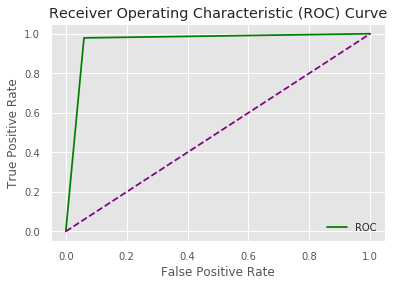

In [24]:
#Import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
#-----------------------------------------------

plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0, 1], [0, 1], color='purple', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [25]:
print(logreg.coef_)

[[-2.54965223 -2.5271701  -1.43533701 -1.29381498 -1.53050193 -2.4020746
  -1.34835962 -0.98744725]]


In [26]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                          1.295429e-315
Clump Thickness                 3.231681e-27
Uniformity of Cell Size         3.575668e-10
Marginal Adhesion               9.805591e-09
Single Epithelial Cell Size     3.737951e-02
Bare Nuclei                     6.277837e-12
Bland Chromatin                 1.512577e-10
Normal Nucleoli                 1.055438e-04
Mitoses                         9.424861e-01
dtype: float64

<div class="alert alert-info"> 

### Overdispersion
</div>

In statistics, overdispersion is the presence of greater variability in a data set than would be expected based on a given statistical mode

<div class="alert alert-info"> 

### References

</div>

- https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5769953/